# Exploratory Data Analysis on US accidents
 
This is a countrywide car accident dataset, which covers __49__ states of the USA. The accident data are collected from February 2016 to Dec 2021, using multiple APIs that provide streaming traffic incident (or event) data. These APIs broadcast traffic data captured by a variety of entities, such as the US and state departments of transportation, law enforcement agencies, traffic cameras, and traffic sensors within the road-networks. Currently, there are about 2.8 million accident records in this dataset. Check [here](https://smoosavi.org/datasets/us_accidents) to learn more about this dataset.

The population dataset of USA for the year of __2015__ is used as well to compare the number of accidents with the population of the state.

## Data preparation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df = pd.read_csv("US_accidents.csv")
pop_df = pd.read_excel("US City Populations.xlsx")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [4]:
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}
abbrev_to_us_state = dict(map(reversed, us_state_to_abbrev.items()))

In [5]:
# To convert the US state abbreviations to their full names 
df['State'] = [abbrev_to_us_state.get(item,item)  for item in df['State']]

In [6]:
pop_df.info()
pop_df = pop_df.drop(['Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6'], axis = 1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6889 entries, 0 to 6888
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   State       6889 non-null   object 
 1   City        6889 non-null   object 
 2   Population  6889 non-null   int64  
 3   Unnamed: 3  0 non-null      float64
 4   Unnamed: 4  0 non-null      float64
 5   Unnamed: 5  0 non-null      float64
 6   Unnamed: 6  0 non-null      float64
dtypes: float64(4), int64(1), object(2)
memory usage: 376.9+ KB


In [7]:
state_wise = df.groupby(['State']).size().reset_index(name='accident_count')
pop_state = pop_df.groupby(['State']).sum().reset_index()

# I had to group cities and State together because apparently US has many cities of same name. Like Miami is in Oklahoma and Florida
city_wise = df.groupby(['City', 'State']).size().reset_index(name='accident_count')

In [8]:
city_wise.sort_values(by = 'accident_count', ascending = False)

,City,State,accident_count
9722,Miami,Florida,106896
8819,Los Angeles,California,68956
11382,Orlando,Florida,54654
3661,Dallas,Texas,41615
7151,Houston,Texas,39366
...,...,...,...
4625,Elk,Washington,1
1894,Bruington,Virginia,1
12739,Richford,Vermont,1
15208,Trenton,North Carolina,1


In [9]:
city_df = pd.merge(city_wise, pop_df, on = ['City', 'State'])
city_df['ratio'] = city_df['Population'] / city_df['accident_count']
city_df.head()

,City,State,accident_count,Population,ratio
0,Abbeville,Louisiana,1,12446,12446.000000
1,Aberdeen,Maryland,518,15434,29.795367
2,Aberdeen,North Carolina,15,7131,475.400000
3,Aberdeen,Washington,36,16255,451.527778
4,Abilene,Texas,10,120958,12095.800000


In [10]:
pop_state.head()

,State,Population
0,Alabama,2871858
1,Alaska,504693
2,Arizona,6414744
3,Arkansas,1506563
4,California,42058827


In [11]:
state_df = pd.merge(state_wise, pop_state, on = 'State')
state_df['ratio'] = state_df['Population'] / state_df['accident_count']
state_df.head()

,State,accident_count,Population,ratio
0,Alabama,19322,2871858,148.631508
1,Arizona,56504,6414744,113.527255
2,Arkansas,10935,1506563,137.774394
3,California,795868,42058827,52.846486
4,Colorado,25340,5835761,230.298382


## Data Cleaning

In [12]:
missing= df.isnull().sum().sort_values(ascending=False)
percent= (df.isnull().sum()/df.notnull().count()*100).sort_values(ascending=False)
Total_missing_values= pd.concat([missing,percent],axis=1,keys=["missing","percent"])
Total_missing_values

,missing,percent
Number,1743911,61.290031
Precipitation(in),549458,19.310789
Wind_Chill(F),469643,16.505678
Wind_Speed(mph),157944,5.550967
Wind_Direction,73775,2.592834
Humidity(%),73092,2.568830
Weather_Condition,70636,2.482514
Visibility(mi),70546,2.479350
Temperature(F),69274,2.434646
Pressure(in),59200,2.080593


In [13]:
new_df= df.drop(['Number', 'Civil_Twilight', 'Astronomical_Twilight', 'Nautical_Twilight', 'Wind_Direction', 'Weather_Timestamp', 'Airport_Code','End_Lat', 'End_Lng', 'Side'],axis=1)

In [14]:
new_df['Start_Time']= pd.to_datetime(new_df.Start_Time)

In [15]:
new_df= new_df.dropna(subset=["Weather_Condition","Timezone","Sunrise_Sunset","Zipcode", "Pressure(in)", "Visibility(mi)","Humidity(%)", "Street"])

In [16]:
new_df["Wind_Speed(mph)"].interpolate(method= 'linear',limit_direction="forward",inplace=True)

For choosing between filling the null values with __mean__ or __median__; we plot a box plot for each category and look if we got a skewed result. For example in the plot observed below we find that prepitation has skewed results. Hence me use median for that instead of mean.

Text(0.5, 1.0, 'Precipitation')

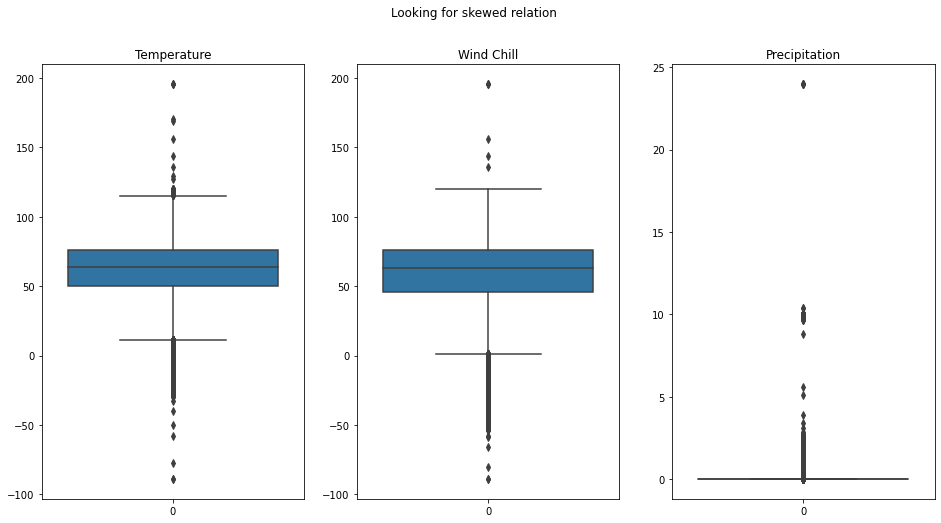

In [17]:
fig, axs = plt.subplots(1,3, figsize = (16,8))
fig.suptitle('Looking for skewed relation')

sns.boxplot(data = df['Temperature(F)'], ax=axs[0])
axs[0].set_title("Temperature")
sns.boxplot(data = df['Wind_Chill(F)'], ax=axs[1])
axs[1].set_title("Wind Chill")
sns.boxplot(data = df['Precipitation(in)'], ax=axs[2])
axs[2].set_title("Precipitation")

In [18]:
new_df["Temperature(F)"].fillna(new_df["Temperature(F)"].mean(),inplace=True)
new_df["Precipitation(in)"].fillna(new_df["Precipitation(in)"].median(),inplace=True)
new_df["Wind_Chill(F)"].fillna(new_df["Wind_Chill(F)"].mean(),inplace=True)

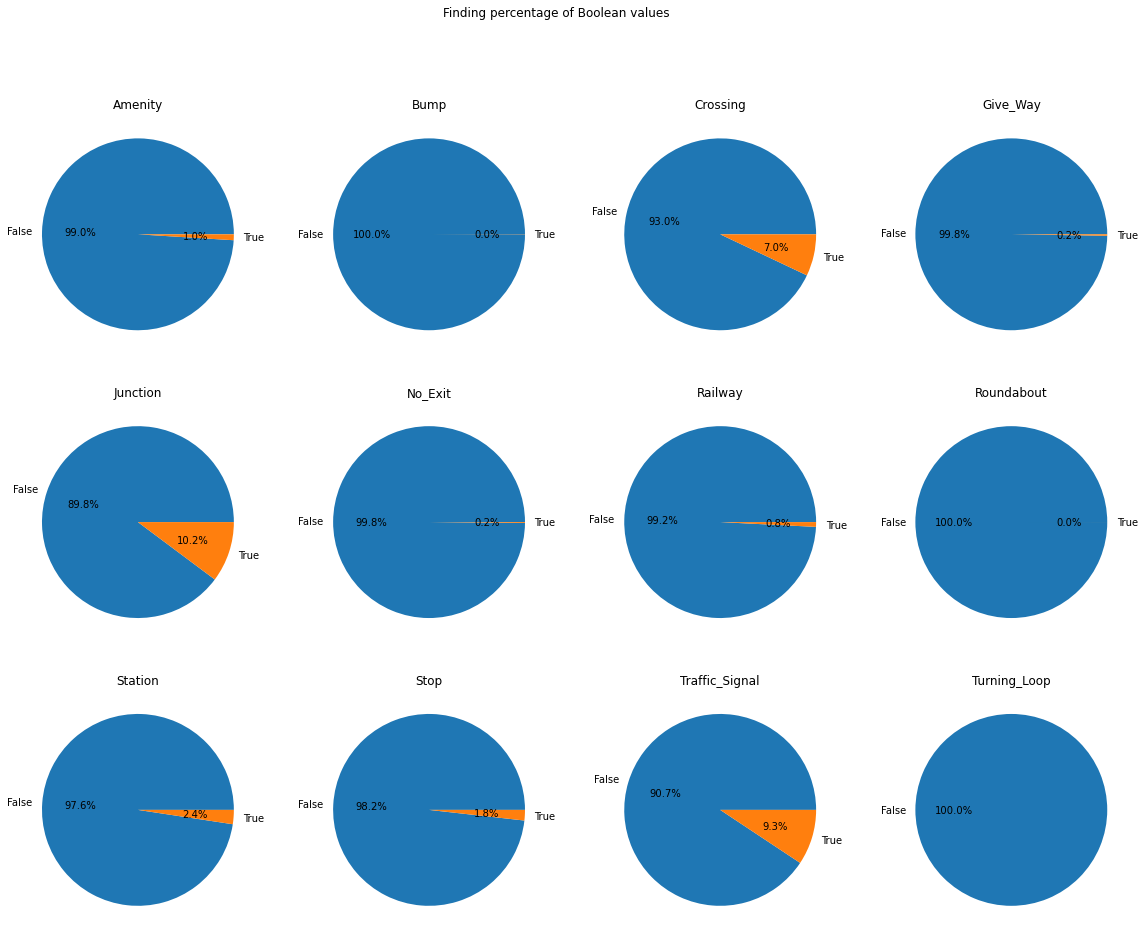

In [19]:
fig, axs = plt.subplots(3,4, figsize = (20,15))
fig.suptitle('Finding percentage of Boolean values')

df1 = pd.DataFrame(df['Amenity'].value_counts().reset_index())
axs[0,0].pie(data = df1,x = 'Amenity', labels = 'index', autopct='%1.1f%%')
axs[0,0].set_title("Amenity")

df1 = pd.DataFrame(df['Bump'].value_counts().reset_index())
axs[0,1].pie(data = df1,x = 'Bump', labels = 'index', autopct='%1.1f%%')
axs[0,1].set_title("Bump")

df1 = pd.DataFrame(df['Crossing'].value_counts().reset_index())
axs[0,2].pie(data = df1,x = 'Crossing', labels = 'index', autopct='%1.1f%%')
axs[0,2].set_title("Crossing")

df1 = pd.DataFrame(df['Give_Way'].value_counts().reset_index())
axs[0,3].pie(data = df1,x = 'Give_Way', labels = 'index', autopct='%1.1f%%')
axs[0,3].set_title("Give_Way")

df1 = pd.DataFrame(df['Junction'].value_counts().reset_index())
axs[1,0].pie(data = df1,x = 'Junction', labels = 'index', autopct='%1.1f%%')
axs[1,0].set_title("Junction")

df1 = pd.DataFrame(df['No_Exit'].value_counts().reset_index())
axs[1,1].pie(data = df1,x = 'No_Exit', labels = 'index', autopct='%1.1f%%')
axs[1,1].set_title("No_Exit")

df1 = pd.DataFrame(df['Railway'].value_counts().reset_index())
axs[1,2].pie(data = df1,x = 'Railway', labels = 'index', autopct='%1.1f%%')
axs[1,2].set_title("Railway")

df1 = pd.DataFrame(df['Roundabout'].value_counts().reset_index())
axs[1,3].pie(data = df1,x = 'Roundabout', labels = 'index', autopct='%1.1f%%')
axs[1,3].set_title("Roundabout")

df1 = pd.DataFrame(df['Station'].value_counts().reset_index())
axs[2,0].pie(data = df1,x = 'Station', labels = 'index', autopct='%1.1f%%')
axs[2,0].set_title("Station")

df1 = pd.DataFrame(df['Stop'].value_counts().reset_index())
axs[2,1].pie(data = df1,x = 'Stop', labels = 'index', autopct='%1.1f%%')
axs[2,1].set_title("Stop")

df1 = pd.DataFrame(df['Traffic_Signal'].value_counts().reset_index())
axs[2,2].pie(data = df1,x = 'Traffic_Signal', labels = 'index', autopct='%1.1f%%')
axs[2,2].set_title("Traffic_Signal")

df1 = pd.DataFrame(df['Turning_Loop'].value_counts().reset_index())
axs[2,3].pie(data = df1,x = 'Turning_Loop', labels = 'index', autopct='%1.1f%%')
axs[2,3].set_title("Turning_Loop")

plt.show()

It is perfectly clear that expect Crossing, Junction, Stop and Traffic Signal, all the columns compared above are useless since it doesn't even have more than 1% values as True. Thats why we drop rest of the columns.

In [20]:
new_df= new_df.drop(['Amenity', 'Bump', 'Give_Way', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Traffic_Calming', 'Turning_Loop'],axis=1)

In [21]:
missing= new_df.isnull().sum().sort_values(ascending=False)
percent= (new_df.isnull().sum()/new_df.notnull().count()*100).sort_values(ascending=False)
Total_missing_values= pd.concat([missing,percent],axis=1,keys=["missing","percent"])
Total_missing_values

,missing,percent
ID,0,0.0
Severity,0,0.0
Traffic_Signal,0,0.0
Stop,0,0.0
Junction,0,0.0
Crossing,0,0.0
Weather_Condition,0,0.0
Precipitation(in),0,0.0
Wind_Speed(mph),0,0.0
Visibility(mi),0,0.0


## Data Visualization

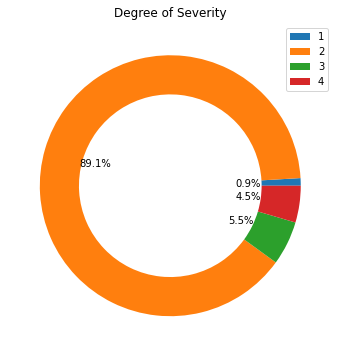

'\nShows the severity of the accident, a number between 1 and 4, where 1 indicates the least impact on traffic (i.e., short delay \nas a result of the accident) and 4 indicates a significant impact on traffic (i.e., long delay).\n'

In [22]:
fig,axs= plt.subplots(figsize=(9,6))
cmap=plt.get_cmap('tab10')
clr=cmap(np.arange(4))
accidents_severity= new_df.groupby('Severity').count()['ID']
plt.pie(accidents_severity,wedgeprops=dict(width=0.3),autopct='%.1f%%',colors= clr)
plt.legend(accidents_severity.index,loc='upper right')
plt.title('Degree of Severity')
plt.show();
'''
Shows the severity of the accident, a number between 1 and 4, where 1 indicates the least impact on traffic (i.e., short delay 
as a result of the accident) and 4 indicates a significant impact on traffic (i.e., long delay).
'''

### Location Analysis

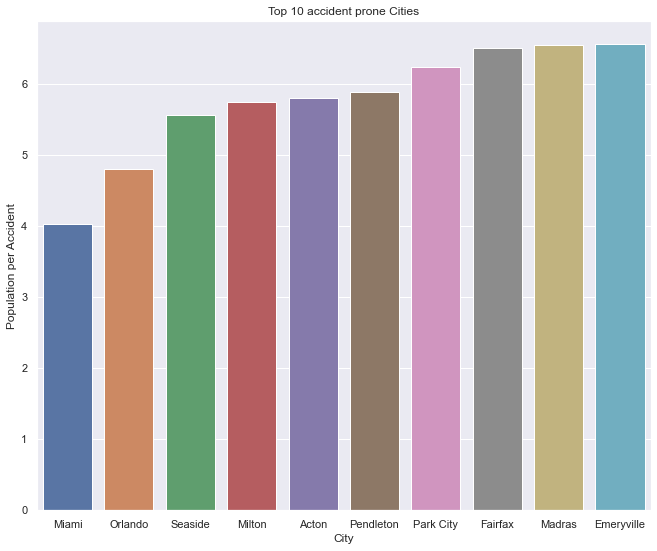

In [23]:
city_plot = city_df.sort_values(by = 'ratio').head(10)

sns.set_style('dark')
sns.set(rc={'figure.figsize':(11,9)})
sns.barplot(x=city_plot['City'],y= city_plot['ratio'])
plt.xlabel('City')
plt.ylabel('Population per Accident')
plt.title("Top 10 accident prone Cities")
plt.show()

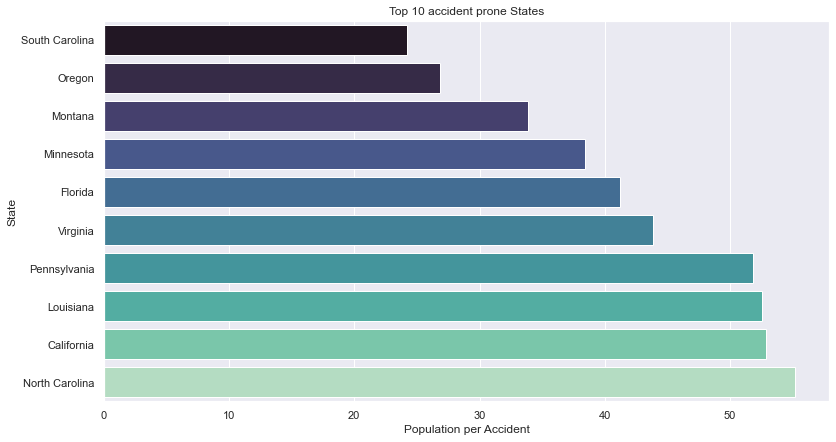

In [24]:
state_plot = state_df.sort_values(by = 'ratio').head(10)

fig,axs= plt.subplots(figsize=(13,7))
sns.barplot(x = state_plot['ratio'], y = state_plot['State'],palette= 'mako')
plt.ylabel('State')
plt.xlabel('Population per Accident')
plt.title('Top 10 accident prone States')
plt.show()

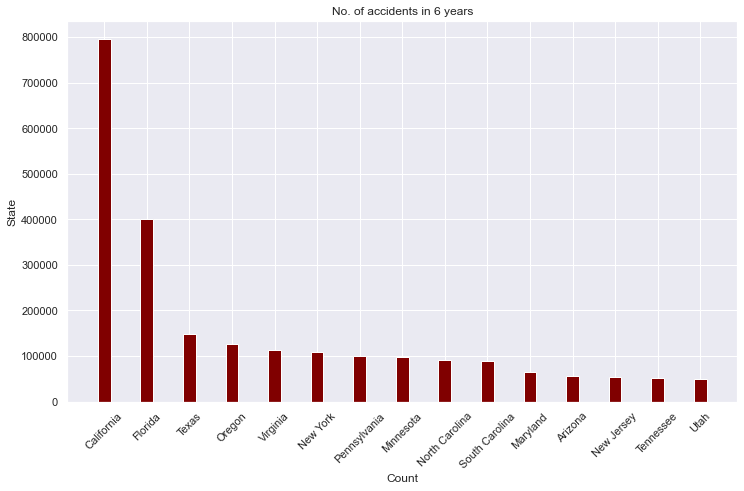

In [25]:
state_count15=df["State"].value_counts().sort_values(ascending=False)[:15]
fig = plt.figure(figsize = (12, 7))
 
# creating the bar plot
plt.bar(x = state_count15.index , height = state_count15.values , color ='maroon', width = 0.3)
 
plt.xlabel("Count")
plt.xticks(rotation=45)
plt.ylabel("State")
plt.title("No. of accidents in 6 years")
plt.show()

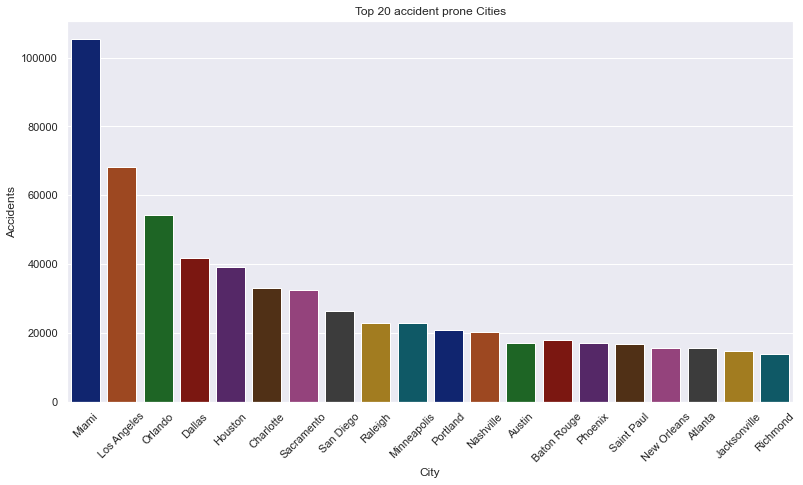

In [26]:
city_count= df.City.value_counts()
fig,axs= plt.subplots(figsize=(13,7))
sns.countplot(x="City",order= city_count.index[:20],data= new_df,palette= 'dark')
plt.ylabel('Accidents')
plt.xticks(rotation=45)
plt.title('Top 20 accident prone Cities')
plt.show()

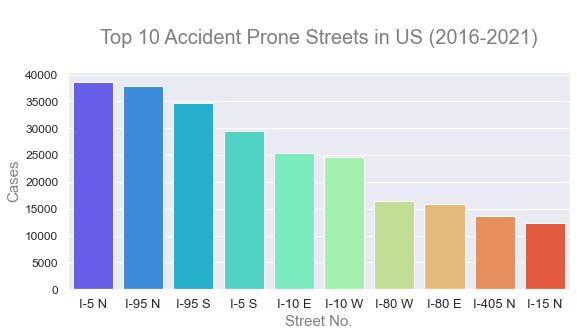

In [27]:
street = pd.DataFrame(new_df.Street.value_counts().reset_index().rename(columns={'index':'Street No.', 'Street':'Cases'}))
top_street = pd.DataFrame(street.head(10))
plt.figure(figsize=(9,4))
plt.title('\nTop 10 Accident Prone Streets in US (2016-2021)\n', size=20, color='grey')
plt.xlabel('\nStreet No.\n', fontsize=15, color='grey')
plt.ylabel('\nAccident Cases\n', fontsize=15, color='grey')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
a = sns.barplot(x=top_street["Street No."],y=top_street.Cases,palette="rainbow")
plt.show()

In [28]:
for (i,j) in zip(street["Street No."],range(0,10)):
    print("Percentage of accident cases reported on street: {} is {:.2f}%".format(i,(street.Cases[j]/len(street.Cases)*100)))

Percentage of accident cases reported on street: I-5 N is 24.77%
Percentage of accident cases reported on street: I-95 N is 24.31%
Percentage of accident cases reported on street: I-95 S is 22.25%
Percentage of accident cases reported on street: I-5 S is 18.97%
Percentage of accident cases reported on street: I-10 E is 16.31%
Percentage of accident cases reported on street: I-10 W is 15.79%
Percentage of accident cases reported on street: I-80 W is 10.56%
Percentage of accident cases reported on street: I-80 E is 10.16%
Percentage of accident cases reported on street: I-405 N is 8.75%
Percentage of accident cases reported on street: I-15 N is 7.96%


### Weather Analysis

In [29]:
weather = new_df.iloc[:, 15:23]
weather['Severity'] = new_df['Severity']
weather.head()

,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Weather_Condition,Severity
0,42.1,36.10000,58.0,29.76,10.0,10.4,0.00,Light Rain,3
1,36.9,59.69335,91.0,29.68,10.0,10.4,0.02,Light Rain,2
2,36.0,59.69335,97.0,29.70,10.0,10.4,0.02,Overcast,2
3,39.0,59.69335,55.0,29.65,10.0,10.4,0.00,Overcast,2
4,37.0,29.80000,93.0,29.69,10.0,10.4,0.01,Light Rain,3


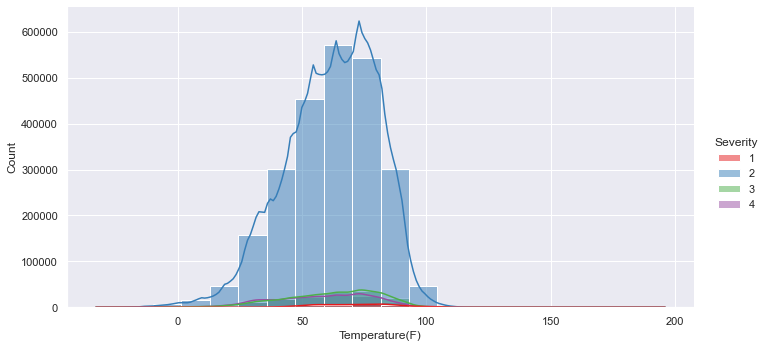

In [30]:
sns.displot(weather, x="Temperature(F)", hue="Severity", palette="Set1", height=5, aspect=2,bins=20,kde=True);

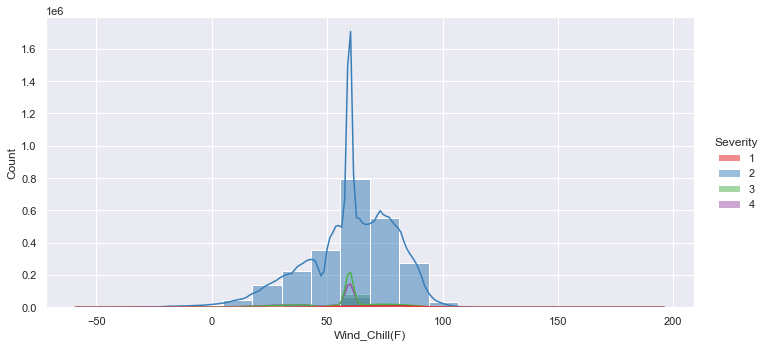

In [31]:
sns.displot(weather, x="Wind_Chill(F)", hue="Severity",palette="Set1", height=5, aspect=2,bins=20,kde=True);

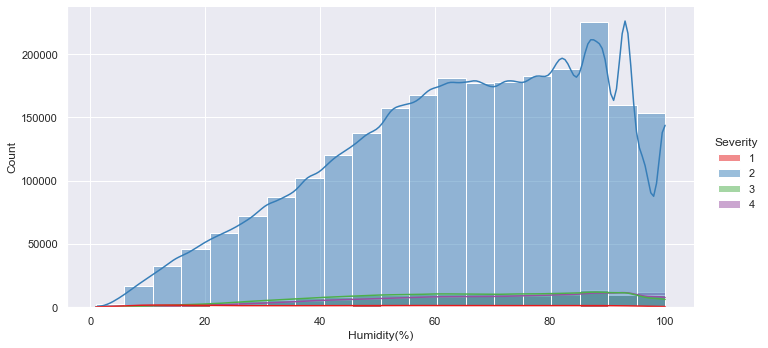

In [32]:
sns.displot(weather, x="Humidity(%)", hue="Severity", palette="Set1", height=5, aspect=2,bins=20,kde=True);

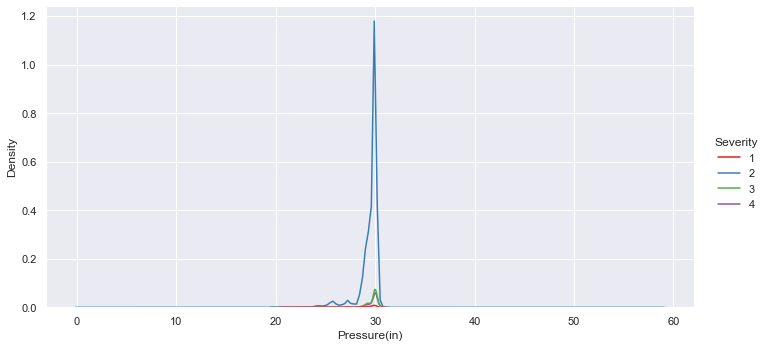

In [33]:
sns.displot(weather, x="Pressure(in)", hue="Severity", palette="Set1", height=5, aspect=2,kind='kde');

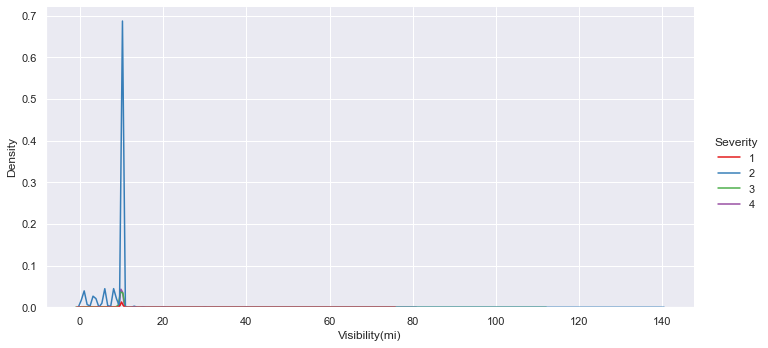

In [34]:
sns.displot(weather, x="Visibility(mi)", hue="Severity", palette="Set1", height=5, aspect=2,kind='kde');

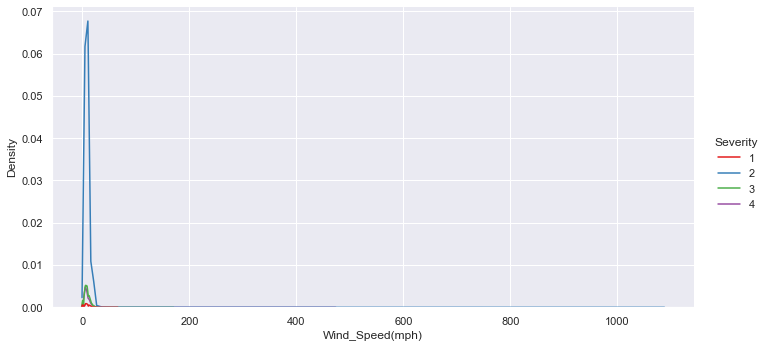

In [35]:
sns.displot(weather, x="Wind_Speed(mph)", hue="Severity", palette="Set1", height=5, aspect=2,kind='kde');

In [36]:
new_df['Start_Time']= pd.to_datetime(new_df.Start_Time)

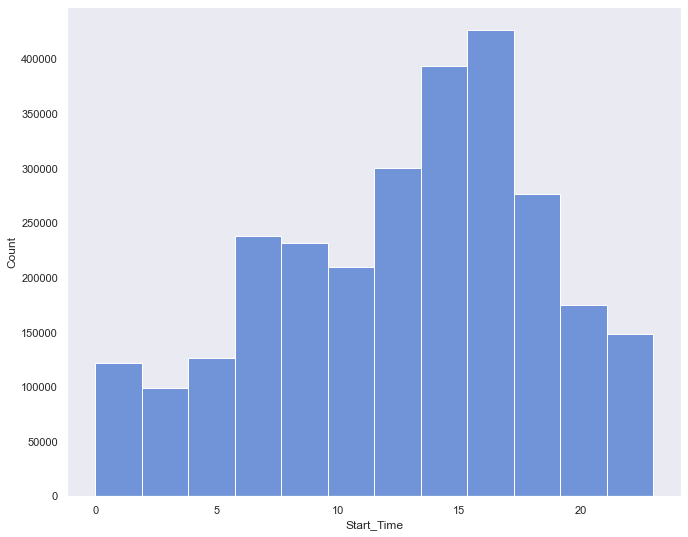

In [37]:
#Accidents by the hour
hr=new_df.Start_Time.dt.hour
sns.set(color_codes=True)
sns.set(style="dark", palette="muted")
sns.histplot(hr,bins= 12);

C:\Users\91702\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


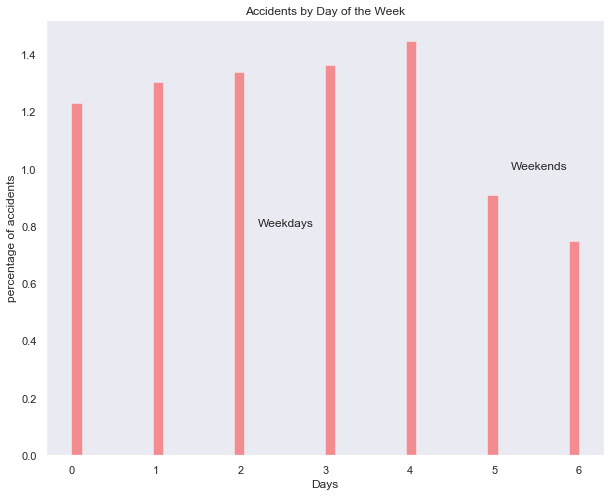

In [38]:
#Accident occurence by day of week
days=new_df.Start_Time.dt.dayofweek
fig, axs = plt.subplots(figsize=(10,8))
sns.distplot(days,kde=False,norm_hist=True,color='red');
plt.annotate('Weekdays',xy=(2.2,0.8))
plt.annotate('Weekends',xy=(5.2,1.0))
plt.xlabel('Days')
plt.ylabel('percentage of accidents')
plt.title('Accidents by Day of the Week')
plt.show()

Text(0.5, 1.0, 'Accidents by Month of the Year')

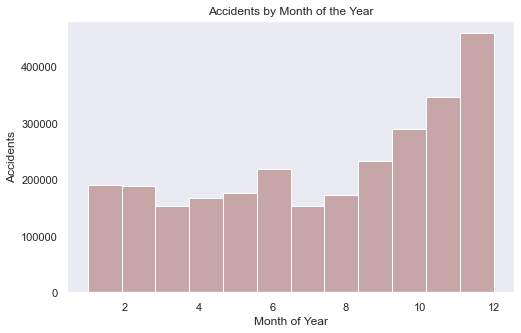

In [39]:
#Monthly Analysis of accidents
fig, ax = plt.subplots(figsize=(8,5))
sns.histplot(new_df['Start_Time'].dt.month, bins = 12,color='rosybrown')

plt.xlabel("Month of Year")
plt.ylabel("Accidents")
plt.title('Accidents by Month of the Year')

In [40]:
year = pd.DataFrame(new_df.Start_Time.dt.year.value_counts()).reset_index().rename(columns={"index":"Year","Start_Time":"Accident_Cases"})

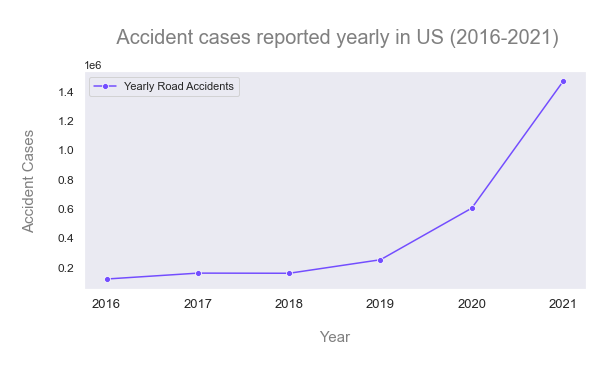

In [41]:
plt.figure(figsize=(9,4))
plt.title('\n Accident cases reported yearly in US (2016-2021)\n', size=20, color='grey')
plt.xlabel('\n Year \n', fontsize=15, color='grey')
plt.ylabel('\nAccident Cases\n', fontsize=15, color='grey')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
a = sns.lineplot(data = year, marker='o', x='Year', y='Accident_Cases', color = '#734dff', label="Yearly Road Accidents")
a.xaxis.set_ticks(year.Year)

plt.show()

In [42]:
for (i,j) in zip(year.Year,range(0,6)):
  print("Average no. of accidents occuring per hour in year {} is {:.2f}.".format(i,(year.Accident_Cases[j]/365)/24))

Average no. of accidents occuring per hour in year 2021 is 167.26.
Average no. of accidents occuring per hour in year 2020 is 68.62.
Average no. of accidents occuring per hour in year 2019 is 28.45.
Average no. of accidents occuring per hour in year 2017 is 18.03.
Average no. of accidents occuring per hour in year 2018 is 17.92.
Average no. of accidents occuring per hour in year 2016 is 13.44.


## Insight

 - The Severity analysis reveals that the vast majority of accidents are of type 2 -89.1%
 - Over the course of six years in the State of South Carolina, there is 1 in every 25 people that gets into an accident.
 - Over the course of six years in the City of Miami, there is 1 in every 4 people that gets into an accident. 
   (This might be debatable since the data doesnt consider the number of tourist that get into an accident in the city)
 - Less than 5% of cities have more than 1000 yearly accidents.
 - State of California recorded the largest number of accidents.
 - 24.77% accidents occured on Street I-5 N in the last 6 years (2016-2021) in US.
 - Accidents took place despite having average visibility of ~9 miles. This could mean that low visibility was not a reason.
 - For about 75% of the accidents, no precipitation was reported. This could mean that rain was not a problem.
 - Most of the accidents happen between 6am and 10am also between 2pm and 7pm. This might be because, people leave and get back    from work during these intervals, which results in greater movement of population and hence higher the chance of accidents.
 - Accidents are more on weekdays than the weekends
 - Among the months december has the maximum number of accidents followed by november.
 - Accidents are common at a junction, crossing or a traffic signal
 - Average no. of accidents occuring per hour in year 2021 is 167.26 which is the highest of any year in the database. Although this might be a shortcoming of the data collected before and not exactly any indication to the fact that the accidents are increasing in this exponential way